In [42]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math



# Introduction
The following project documentation was written as work assignment for the module "Multivariate Analysis" of the Master in Statistics for Data Science at the Universidad Carlos III de Madrid. It contains the Multivariate Analysis of a Kaggel dataset on physical (gym) excercise data (https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset). The work is split into to parts, where in a first part a exploratory data analysis is performed, where required,  data preprocessing steps are performed and a Prinicipal Component Analysis (PCA) is performed. In the second part, based on the learnings of part one, a (XXXXXXXXXXX) is performed to (XXXXXXXXX). 

# Part 1 - Exploratory Analysis, Preprossesing and PCA
As discussed in the introduction, the first part contains the initial exploratory analysis of the dataset as well as a PCA of the dataset. The dataset at hand is composed out of the following collumns: 

| Attribute                      | Description                                                       |
|--------------------------------|-------------------------------------------------------------------|
| Age                            | Age of the gym member.                                            |
| Gender                         | Gender of the gym member (Male or Female).                        |
| Weight (kg)                    | Member’s weight in kilograms.                                     |
| Height (m)                     | Member’s height in meters.                                        |
| Max_BPM                        | Maximum heart rate (beats per minute) during workout sessions.    |
| Avg_BPM                        | Average heart rate during workout sessions.                       |
| Resting_BPM                    | Heart rate at rest before workout.                                |
| Session_Duration (hours)       | Duration of each workout session in hours.                        |
| Calories_Burned                | Total calories burned during each session.                        |
| Workout_Type                   | Type of workout performed (e.g., Cardio, Strength, Yoga, HIIT).   |
| Fat_Percentage                 | Body fat percentage of the member.                                |
| Water_Intake (liters)          | Daily water intake during workouts.                               |
| Workout_Frequency (days/week)  | Number of workout sessions per week.                              |
| Experience_Level               | Level of experience, from beginner (1) to expert (3).             |
| BMI                            | Body Mass Index, calculated from height and weight.               |

And before starting with the exploratory data analysis, few basic data formatting steps are performed like modifying data types, features names and turning the water intake feature from a continious variable to a binary variable (<2 liters:0,>=2:1) to comply with the assignments requirements.

In [43]:
# Import Data
data_raw = pd.read_csv("gym_members_exercise_tracking.csv")
data_raw.info()
data_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [45]:
### Preprocess Data
data = data_raw.copy()

# dtypes
data['Experience_Level'] = data['Experience_Level'].astype(str)
data['Workout_Frequency (days/week)'] = data['Workout_Frequency (days/week)'].astype(str)

# Make water intake binary
data['Water_intake_binary'] = (data['Water_Intake (liters)'] > 2).astype(int)
data.drop(columns=["Water_Intake (liters)"],inplace=True)

# change column names and make column names lower case
rename_dict = {
    'Age': 'Age',
    'Gender': 'Gender',
    'Weight (kg)': 'Weight_kg',
    'Height (m)': 'Height_m',
    'Max_BPM': 'Max_BPM',
    'Avg_BPM': 'Avg_BPM',
    'Resting_BPM': 'Resting_BPM',
    'Session_Duration (hours)': 'Session_Duration_hrs',
    'Calories_Burned': 'Calories_Burned',
    'Workout_Type': 'Workout_Type',
    'Fat_Percentage': 'Fat_Percentage',
    'Water_Intake (liters)': 'Water_Intake_lts',
    'Workout_Frequency (days/week)': 'Workout_Frequency_days_per_week',
    'Experience_Level': 'Experience_Level',
    'BMI': 'BMI'
}

data.rename(columns=rename_dict, inplace=True)


data.columns = map(str.lower, data.columns)

# print
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              973 non-null    int64  
 1   gender                           973 non-null    object 
 2   weight_kg                        973 non-null    float64
 3   height_m                         973 non-null    float64
 4   max_bpm                          973 non-null    int64  
 5   avg_bpm                          973 non-null    int64  
 6   resting_bpm                      973 non-null    int64  
 7   session_duration_hrs             973 non-null    float64
 8   calories_burned                  973 non-null    float64
 9   workout_type                     973 non-null    object 
 10  fat_percentage                   973 non-null    float64
 11  workout_frequency_days_per_week  973 non-null    object 
 12  experience_level      

In [52]:
# set up list of numeric var for plotting
numeric_variables = ['age','weight_kg','height_m','max_bpm','avg_bpm','resting_bpm','session_duration_hrs','calories_burned','fat_percentage']
categorical_variables = ['gender','workout_type','water_intake_binary','workout_frequency_days_per_week']

TODO: Pairplot interpretation

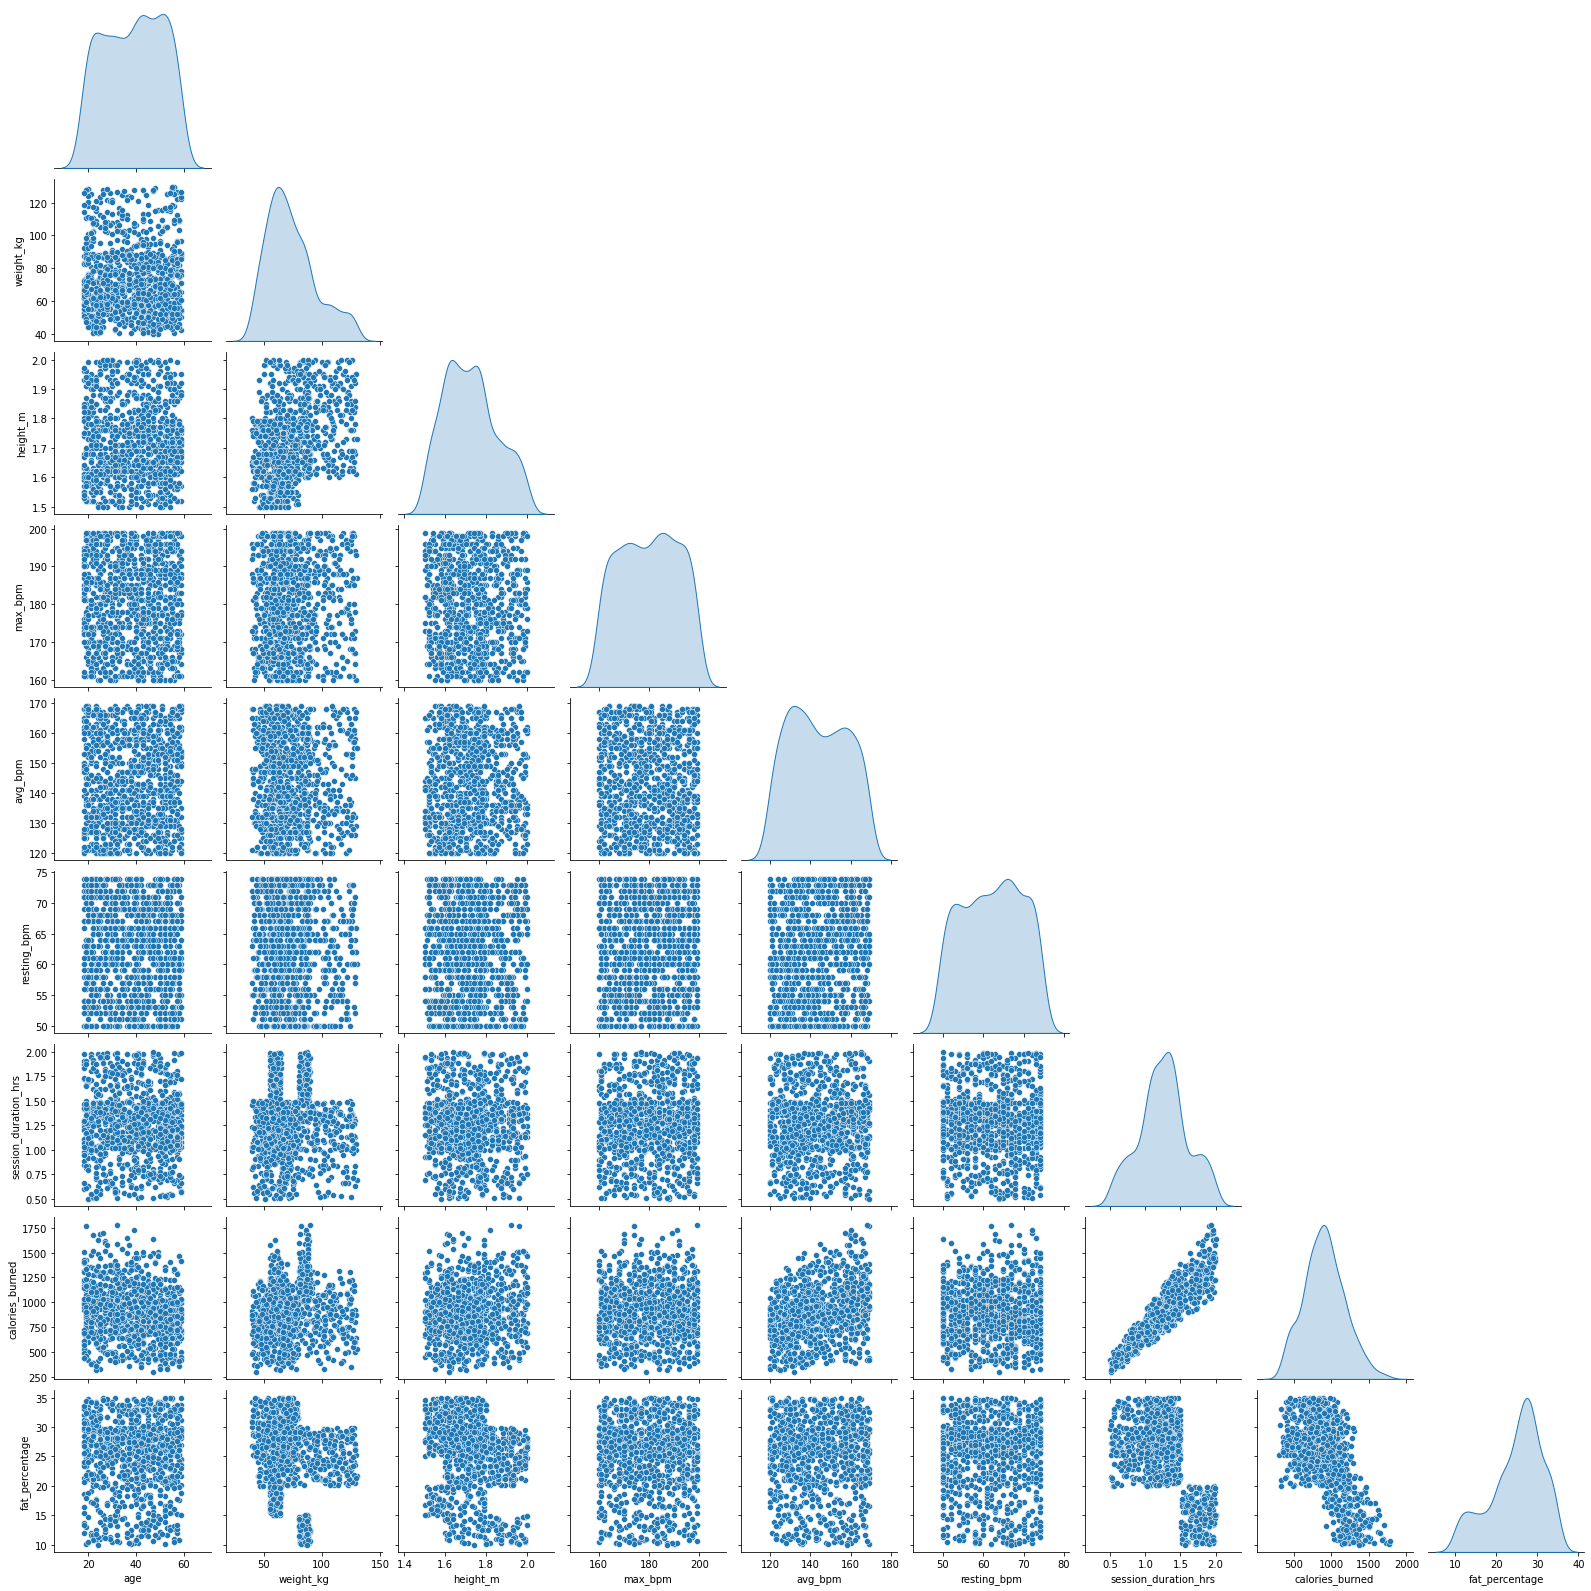

In [53]:
# pairplot
sns.pairplot(data[numeric_variables], diag_kind='kde', corner=True)
plt.show()

TODO: Correlation Plot interpretation

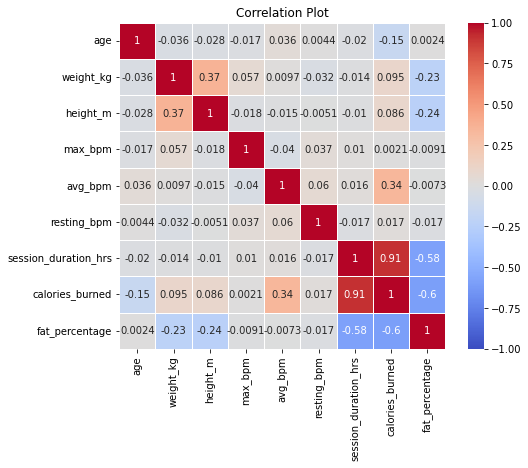

In [54]:
corr_mat = data[numeric_variables].corr()
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

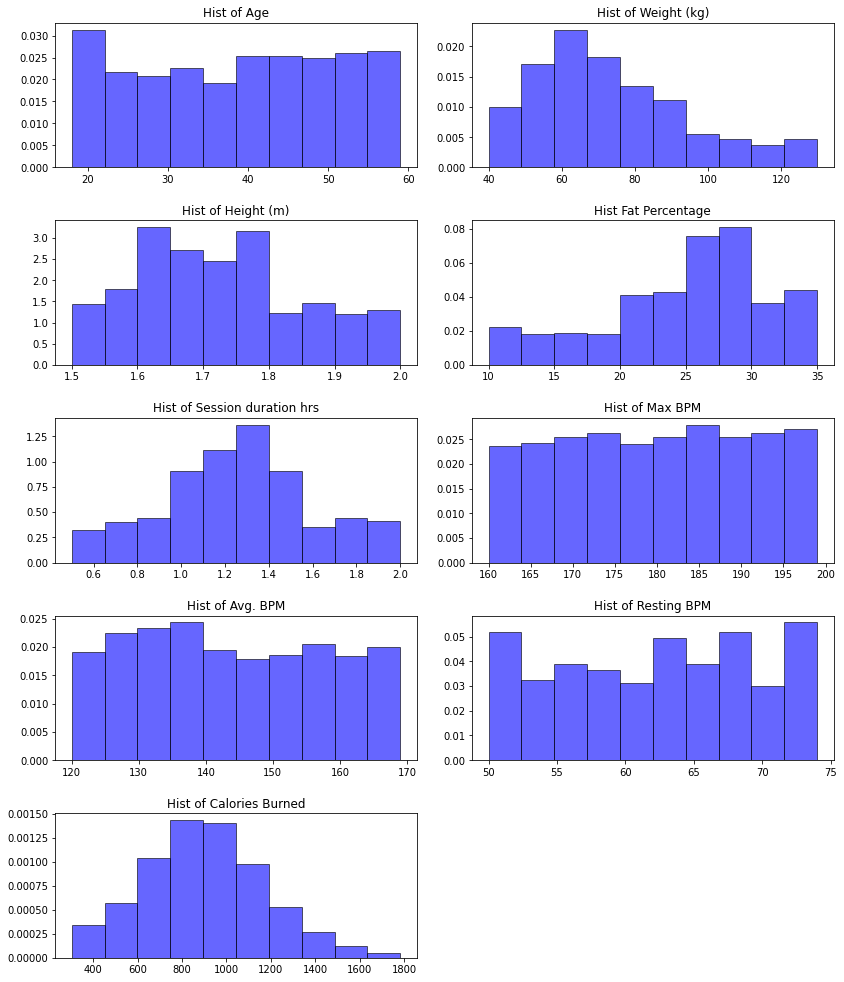

In [55]:
# Histograms
fig, axs = plt.subplots(5,2, figsize=(12, 14))
axs[0,0].hist(data['age'],density=True,alpha=0.6,color='b',edgecolor="black")
axs[0,0].set_title("Hist of Age")
axs[0,1].hist(data['weight_kg'],density=True,alpha=0.6,color='b',edgecolor="black")
axs[0,1].set_title("Hist of Weight (kg)")
axs[1,0].hist(data['height_m'],density=True,alpha=0.6,color='b',edgecolor="black")
axs[1,0].set_title("Hist of Height (m)")
axs[1,1].hist(data['fat_percentage'],bins=10,density=True,alpha=0.6,color='b',edgecolor="black")
axs[1,1].set_title("Hist Fat Percentage")
axs[2,0].hist(data['session_duration_hrs'],density=True,alpha=0.6,color='b',edgecolor="black")
axs[2,0].set_title("Hist of Session duration hrs")
axs[2,1].hist(data['max_bpm'],density=True,alpha=0.6,color='b',edgecolor="black")
axs[2,1].set_title("Hist of Max BPM")
axs[3,0].hist(data['avg_bpm'],density=True,alpha=0.6,color='b',edgecolor="black")
axs[3,0].set_title("Hist of Avg. BPM")
axs[3,1].hist(data['resting_bpm'],density=True,alpha=0.6,color='b',edgecolor="black")
axs[3,1].set_title("Hist of Resting BPM")
axs[4,0].hist(data['calories_burned'],density=True,alpha=0.6,color='b',edgecolor="black")
axs[4,0].set_title("Hist of Calories Burned")
axs[4,1].axis("off")
plt.tight_layout(pad=2.0)


In [59]:
# Function for plotting of conditional histograms 
def plot_categorical_hist(ncols,
                          numeric_variables,
                          categorical_variable,
                          host_stat='count',
                          figsize=(12, 10)
                          ):
    
    nrows = math.ceil(len(numeric_variables)/ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    for i, col in enumerate(numeric_variables):
        row = i // 2 
        col_pos = i % 2 
        sns.histplot(data=data, x=col, bins=10,hue=categorical_variable, kde=True, ax=axes[row, col_pos],stat=host_stat)
        axes[row, col_pos].set_title(f'Distribution of {col}')

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

gender


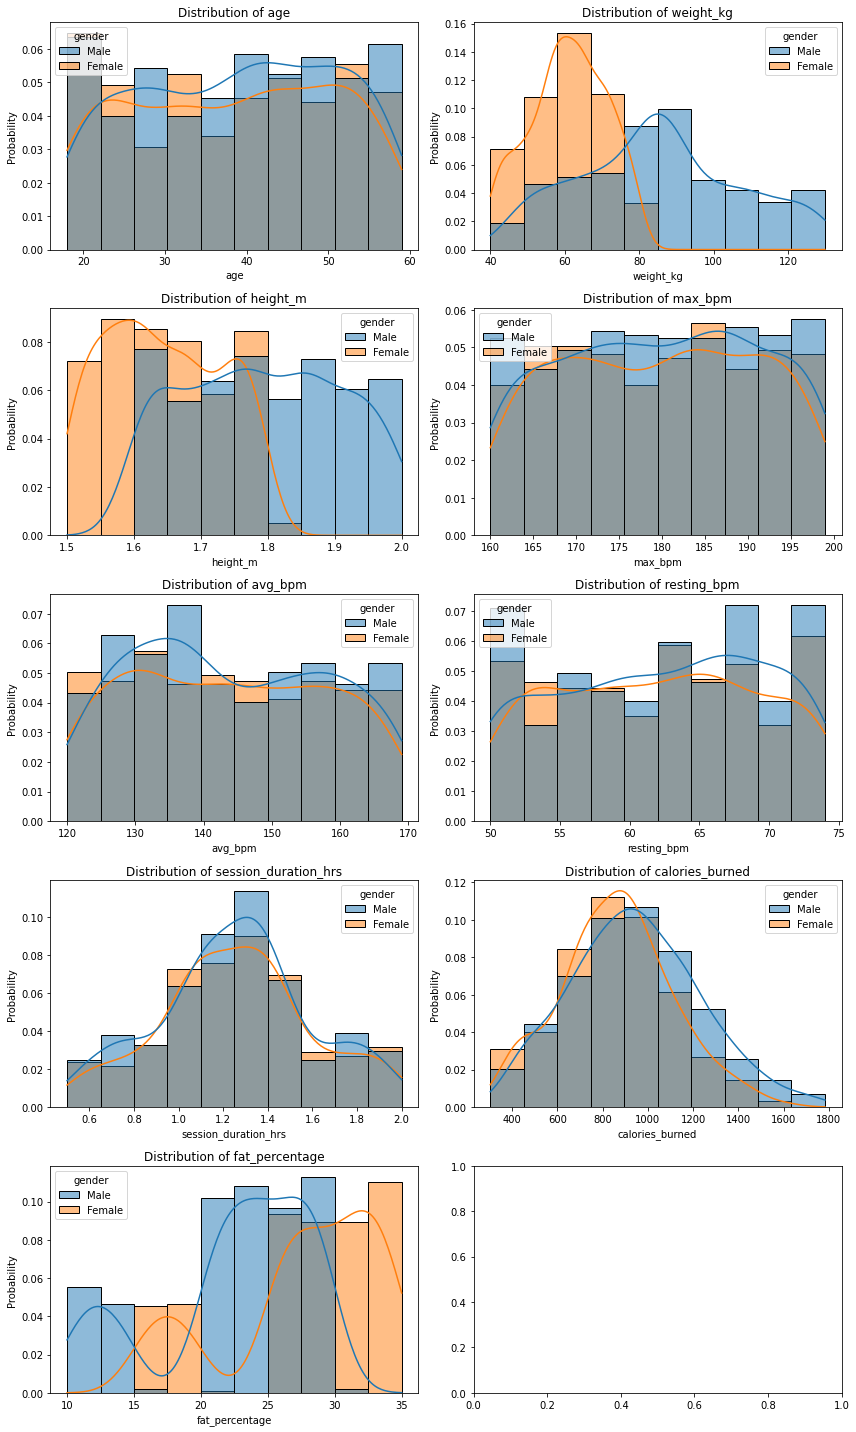

workout_type


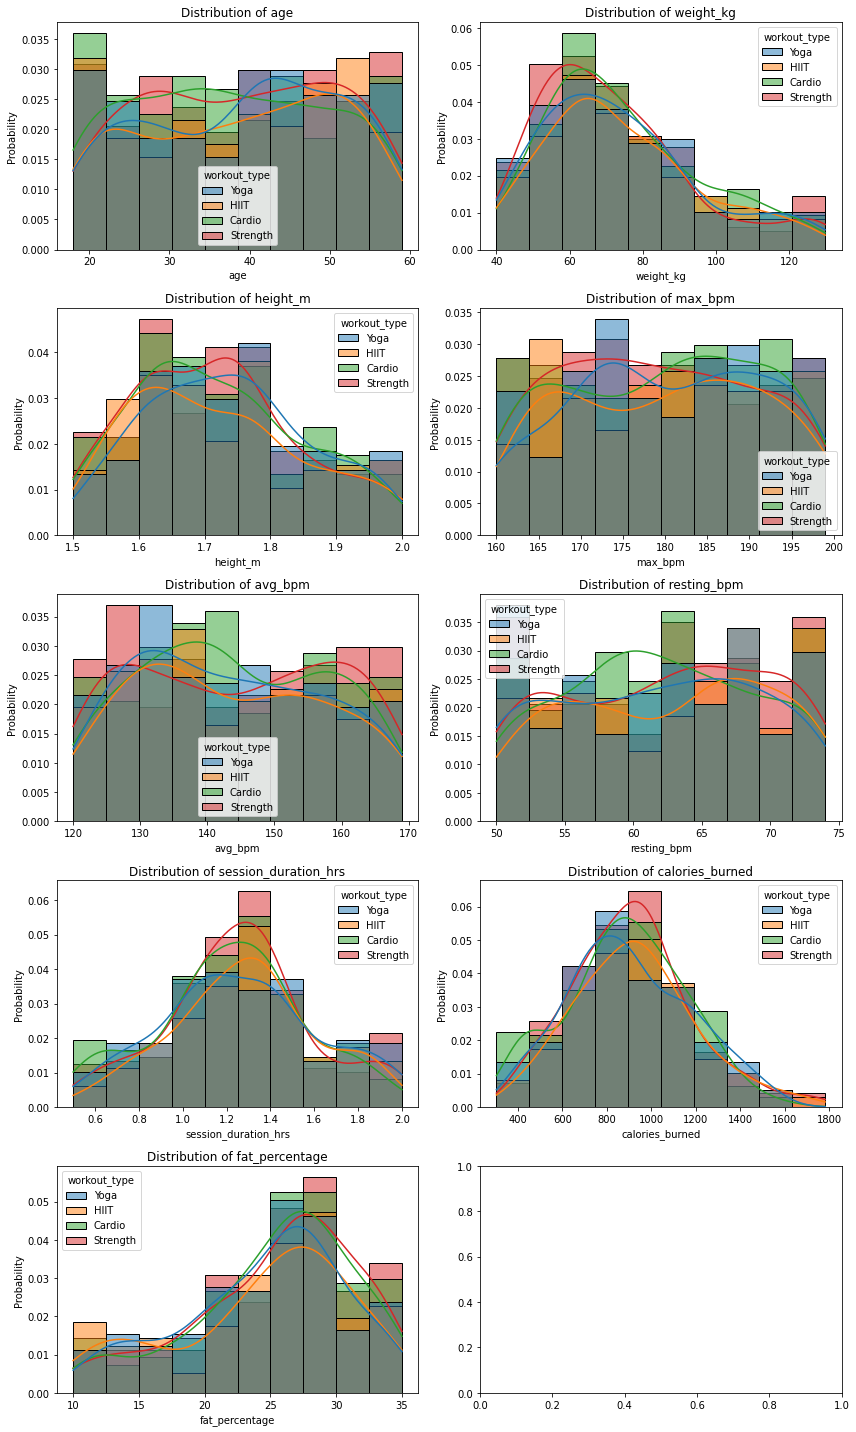

water_intake_binary


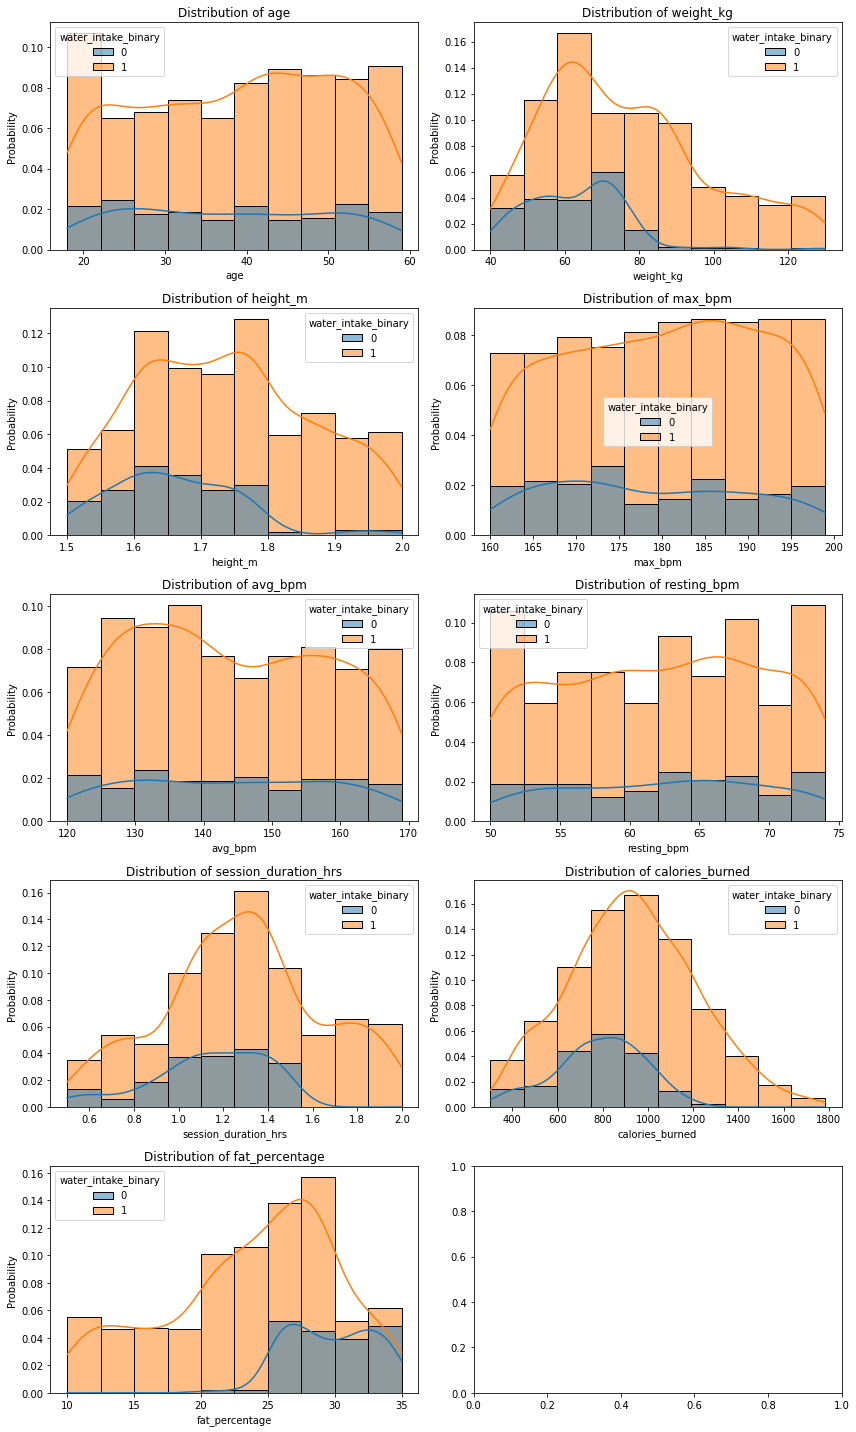

workout_frequency_days_per_week


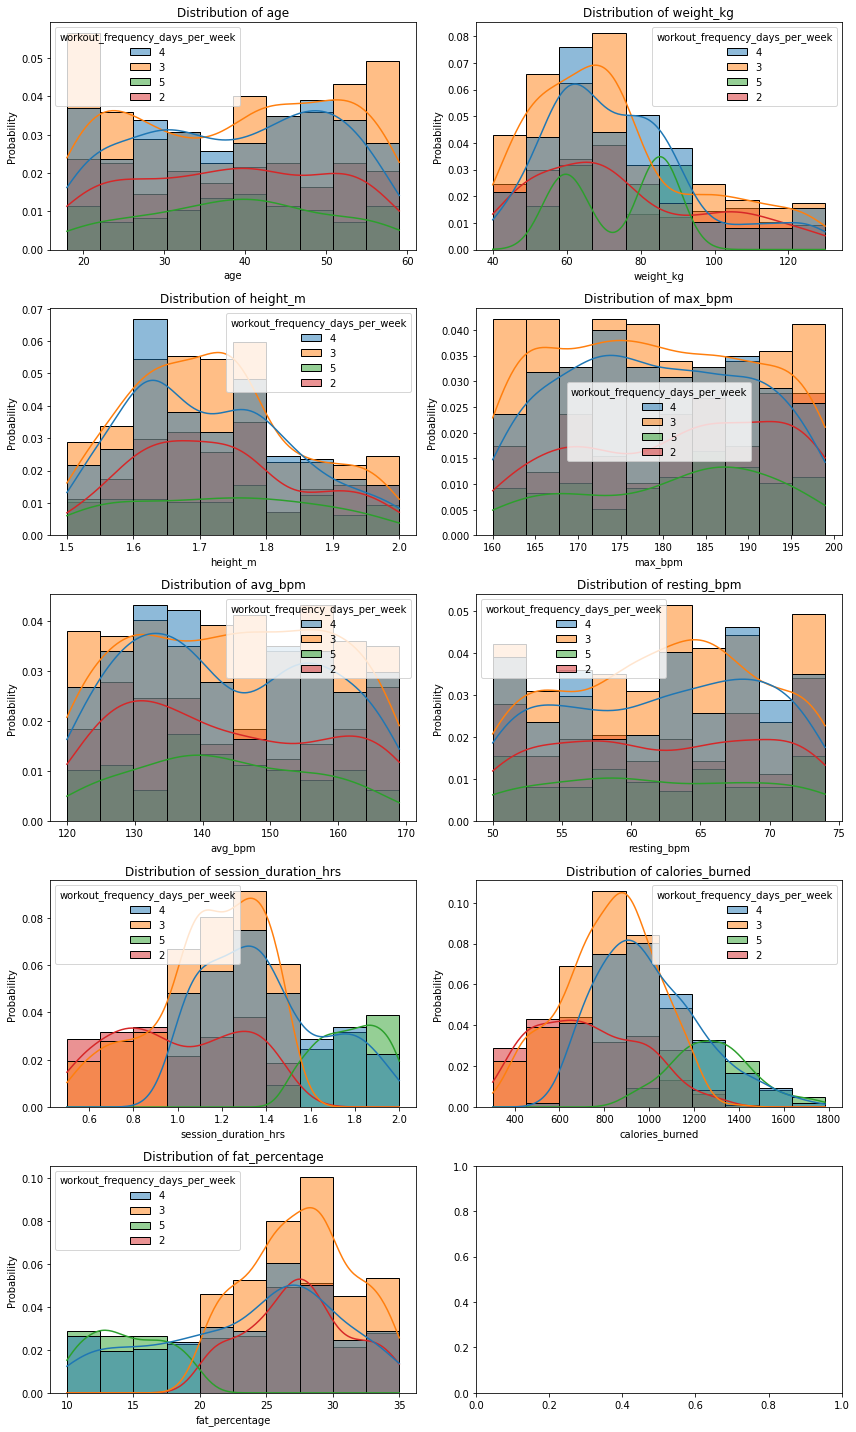

In [62]:
# TODO: Select relevant ones 
for categorical_variable in categorical_variables:
    print(categorical_variable)
    plot_categorical_hist(ncols=2,
                        numeric_variables=numeric_variables,#['calories_burned','session_duration_hrs','fat_percentage','avg_bpm'],
                        categorical_variable=categorical_variable,
                        host_stat='probability',
                        figsize=(12, 20))

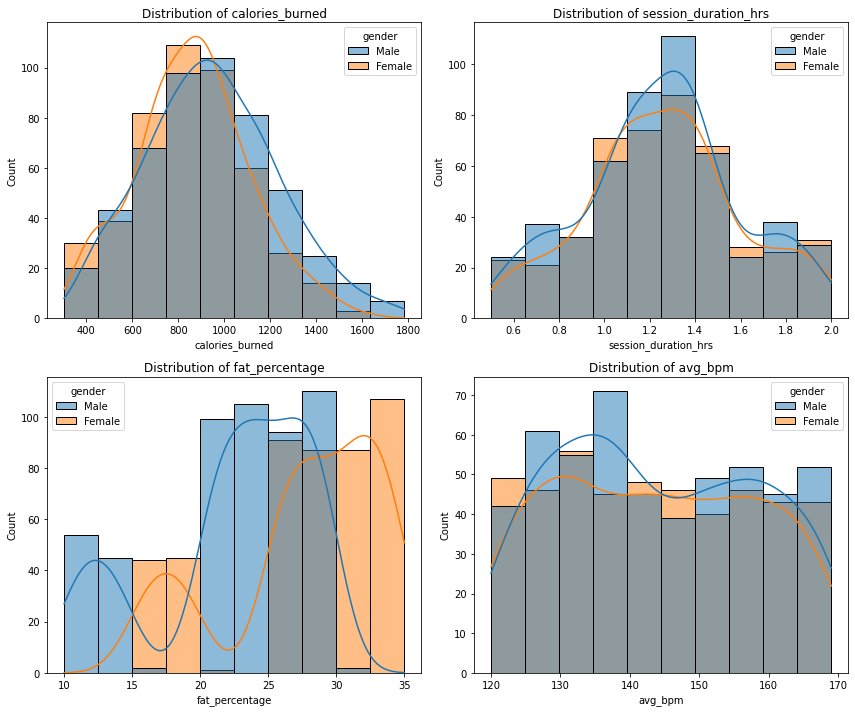

In [64]:
### Relevant ones

# gender -> hight and weight show differences but not relevant for analysis
plot_categorical_hist(ncols=2,
                      numeric_variables=['calories_burned','session_duration_hrs','fat_percentage','avg_bpm'],
                      categorical_variable='gender',
                      figsize=(12, 10))